In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as random

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDClassifier

from calibration_util import *
%matplotlib inline

/home/caitlin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#read in data sets
adult=pd.read_csv("data/adult.data", header=None)
bank=pd.read_csv("data/bank-full.csv", sep=";")
default=pd.read_csv("data/default.csv")
churn=pd.read_csv("data/ibm_churn.csv")
evaluation=pd.read_csv("data/ibm_eval.csv")
# bank_g
bank['marital'][bank['marital']=='divorced'] = 'single'
# print("# single", (bank['marital']=='single').sum())
# print("# married", (bank['marital']=='married').sum())

/home/caitlin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
adult_g = pd.get_dummies(adult[9],drop_first=True)
adult_y = adult[10]
adult_X = pd.get_dummies(adult.drop([9,10], axis=1))
# adult_X.head()
bank_g = pd.get_dummies(bank['marital'],drop_first=True)
bank_y = bank['balance']
bank_X = pd.get_dummies(bank.drop(['marital','balance'], axis=1))
# bank_X.head()
default_g = pd.get_dummies(default['SEX'],drop_first=True)
default_y = default['LIMIT_BAL']
default_X = pd.get_dummies(default.drop(['SEX','LIMIT_BAL','ID'], axis=1))
# default_X.head()
churn_g = pd.get_dummies(churn['gender'],drop_first=True)
churn_y = churn['MonthlyCharges']
churn_X = pd.get_dummies(churn.drop(['customerID','MonthlyCharges','gender','TotalCharges'],axis=1))
# churn_X.head()
# evaluation.columns.values
evaluation_g = pd.get_dummies(evaluation['Gender'],drop_first=True)
evaluation_y = evaluation['MonthlyIncome']
evaluation_X = pd.get_dummies(evaluation.drop(['MonthlyIncome','Gender'], axis=1))
# evaluation_X.head()

In [5]:
# dfs = run(adult_g,adult_y,adult_X)
# df_lr, df_dt, df_rf, df_svr = run(adult_g,adult_y,adult_X)
# df_lr, df_dt, df_rf, df_svr = run(bank_g, bank_y, bank_X)
# df_lr, df_dt, df_rf, df_svr = run(default_g, default_y, default_X)
df_lr, df_dt, df_rf, df_svr = run(churn_g, churn_y, churn_X)
# df_lr, df_dt, df_rf, df_svr = run(evaluation_g, evaluation_y, evaluation_X)

test  (3522,)
train_all  (3521,)
tune  (704,)
train  (2817,)
test  (3522, 43)
train_all  (3521, 43)
tune  (704, 43)
train  (2817, 43)
linear regression mse:  4.87595650475e+19
best alpha:  0.1
lasso mse:  0.0492928997617
best depth of tree:  9
decision tree mse:  0.0199920226883
best depth of tree:  9
random forest mse:  0.0129832783332
Best C value:  10
linear svm:  0.0014880828508


In [6]:
print("KL-divergence")
print("Statistical Parity: ", get_kl_err(df_lr, sliding_prob, window=100, step=10))
print("Calibration: ", get_kl_err(df_lr, sliding_mse, window=100, step=10))
print("Equalized Odds: ", get_kl_err(df_lr, sliding_oe, window=100, step=10), get_kl_err(df_lr, sliding_ue, window=100, step=10))

print("\nSpearman")
print("Statistical Parity: ", get_spear_err(df_lr, sliding_prob, window=100, step=10))
print("Calibration: ", get_spear_err(df_lr, sliding_mse, window=100, step=10))
print("Equalized Odds: ", get_spear_err(df_lr, sliding_oe, window=100, step=10), get_kl_err(df_lr, sliding_ue, window=100, step=10))
print("\nKendall")

print("Statistical Parity: ", get_kendall_err(df_lr, sliding_prob, window=100, step=10))
print("Calibration: ", get_kendall_err(df_lr, sliding_mse, window=100, step=10))
print("Equalized Odds: ", get_kendall_err(df_lr, sliding_oe, window=100, step=10), get_kl_err(df_lr, sliding_ue, window=100, step=10))

KL-divergence
Statistical Parity:  0.0177493279231
Calibration:  0.013951319226
Equalized Odds:  inf inf

Spearman
Statistical Parity:  -1.0029154519
Calibration:  0.982632913891
Equalized Odds:  0.967576676561 inf

Kendall
Statistical Parity:  -1.0
Calibration:  0.810292223202
Equalized Odds:  0.893392038378 inf


Lasso


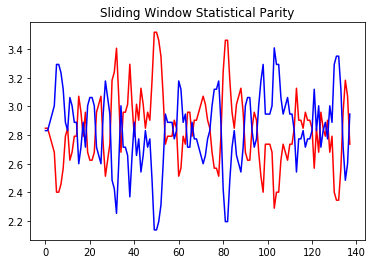

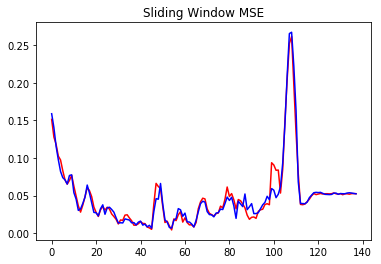

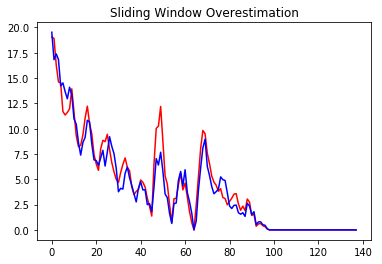

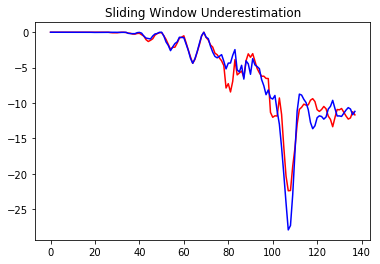

Decision Tree


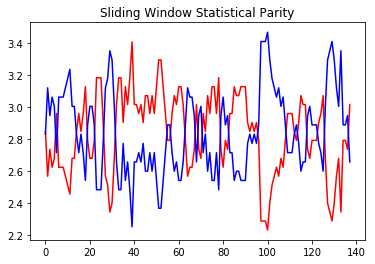

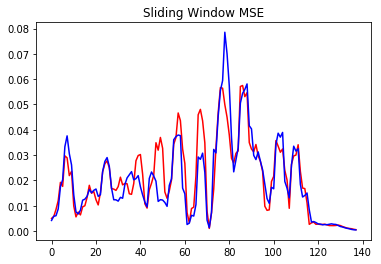

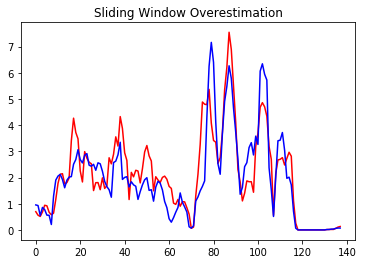

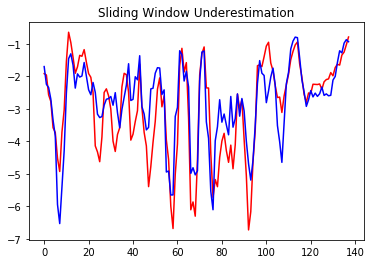

Random Forest


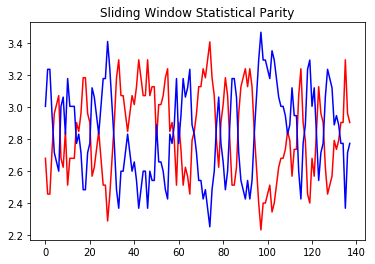

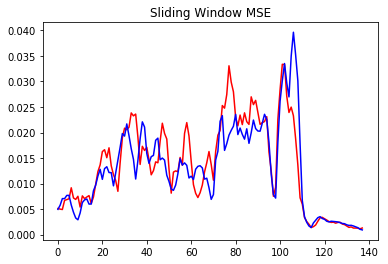

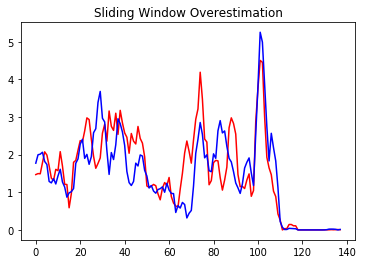

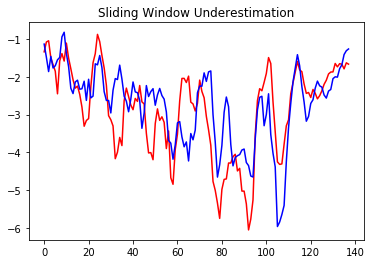

SVR


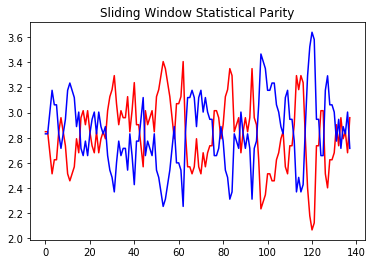

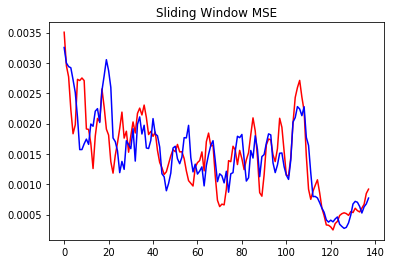

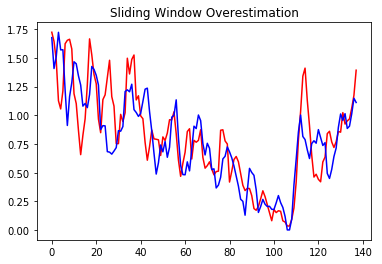

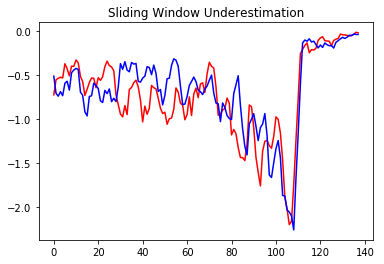

In [10]:
print("Lasso")
plot_errs(df_lr, 100, 25)
print("Decision Tree")
plot_errs(df_dt, 100, 25)
print("Random Forest")
plot_errs(df_rf, 100, 25)
print("SVR")
plot_errs(df_svr, 100, 25)

In [41]:
err0,err1 = sliding_ue(df_lr, 100, 50)
h0 = np.histogram(err0)
h0

(array([ 2,  3,  5, 11, 13,  6, 13,  5,  5,  7]),
 array([-7.39517228, -6.92405185, -6.45293141, -5.98181098, -5.51069055,
        -5.03957011, -4.56844968, -4.09732925, -3.62620881, -3.15508838,
        -2.68396794]))

In [43]:
h1 = np.histogram(err1)
h1

(array([ 2,  1,  1,  5,  5, 14, 16,  9, 10,  7]),
 array([-8.42653932, -7.88021039, -7.33388147, -6.78755254, -6.24122361,
        -5.69489469, -5.14856576, -4.60223683, -4.05590791, -3.50957898,
        -2.96325005]))

In [44]:
stats.entropy(err0, qk=err1)

0.069235419391290784

In [45]:
stats.entropy(err1, qk=err0)

0.070208779501503116

In [63]:
print("lasso")
print(train_test_short(df_lr, 10,10))
print("\ndecision tree")
print(train_test_short(df_dt,10,10))
print("\nranfom forest")
print(train_test_short(df_rf,10,10))
print("\nsvr")
print(train_test_short(df_svr,10,10))

lasso


C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))


                    baseline  calibrate  cal_groups
Mean Squared Error  0.006775   0.001477    0.002327
Absolute Error      2.076340   0.830970    1.342027
Overestimation      0.881038   0.713285    1.997095
Underestimation     1.808866   0.591961    1.431506
Spearman Rho        0.099757   0.058686    0.056329
Kendall Tau         0.096634   0.066174    0.068596
KL divergence       0.003074   0.002454    0.000776

decision tree
                    baseline  calibrate  cal_groups
Mean Squared Error  0.002745   0.003122    0.003275
Absolute Error      0.717236   0.786677    1.407289
Overestimation      0.909940   0.847985    2.854202
Underestimation     0.964338   0.728957    1.804608
Spearman Rho        0.050424   0.053759    0.101746
Kendall Tau         0.064129   0.065495    0.081625
KL divergence            inf        inf         inf

ranfom forest
                    baseline  calibrate  cal_groups
Mean Squared Error  0.001633   0.002229    0.002233
Absolute Error      1.035780   1.2

In [73]:
lr_err = train_test_short(df_lr, 10,10)
dt_err = train_test_short(df_dt,10,10)
rf_err = train_test_short(df_rf,10,10)
svr_err = train_test_short(df_svr,10,10)

C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))


In [79]:
a_lr, a_dt, a_rf, a_svr = run(adult_g,adult_y,adult_X)
b_lr, b_dt, b_rf, b_svr = run(bank_g, bank_y, bank_X)
d_lr, d_dt, d_rf, d_svr = run(default_g, default_y, default_X)
c_lr, c_dt, c_rf, c_svr = run(churn_g, churn_y, churn_X)
e_lr, e_dt, e_rf, e_svr = run(evaluation_g, evaluation_y, evaluation_X)

groups
test  (16280, 1)
train_all  (16281, 1)
tune  (3256, 1)
train  (13025, 1)
y
test  (16280,)
train_all  (16281,)
tune  (3256,)
train  (13025,)
X
test  (16280, 107)
train_all  (16281, 107)
tune  (3256, 107)
train  (13025, 107)
linear regression mse:  6.48069835025e+22
best alpha:  0.1
lasso mse:  0.9494928793
best depth of tree:  1
decision tree mse:  0.97630940286
best depth of tree:  2
random forest mse:  0.957555570249
Best C value:  0.0001
linear svm:  0.944557919134
groups
test  (22606, 1)
train_all  (22605, 1)
tune  (4521, 1)
train  (18084, 1)
y
test  (22606,)
train_all  (22605,)
tune  (4521,)
train  (18084,)
X
test  (22606, 49)
train_all  (22605, 49)
tune  (4521, 49)
train  (18084, 49)
linear regression mse:  5.98818158904e+20
best alpha:  0.1
lasso mse:  1.00212331609
best depth of tree:  3
decision tree mse:  1.02349120004
best depth of tree:  2
random forest mse:  0.99500253631
Best C value:  0.001
linear svm:  0.972615780332
groups
test  (15000, 1)
train_all  (15000, 1)
t

In [105]:
def plot_metric(err):
    lasso_errs = pd.DataFrame()
    a = stabalize_cv(a_lr, 10,10).transpose()[err]
    b = stabalize_cv(b_lr, 10,10).transpose()[err]
    c = stabalize_cv(c_lr, 10,10).transpose()[err]
    d = stabalize_cv(d_lr, 10,10).transpose()[err]
    e = stabalize_cv(e_lr, 10,10).transpose()[err]
    lasso_errs["a"] = a 
    lasso_errs["b"] = b
    lasso_errs["c"] = c
    lasso_errs["d"] = d
    lasso_errs["e"] = e
    lasso_errs.plot(title="Lasso")
    lasso_errs = pd.DataFrame()
    lasso_errs["a"] = stabalize_cv(a_dt, 10,10).transpose()[err]
    lasso_errs["b"] = stabalize_cv(b_dt, 10,10).transpose()[err]
    lasso_errs["c"] = stabalize_cv(c_dt, 10,10).transpose()[err]
    lasso_errs["d"] = stabalize_cv(d_dt, 10,10).transpose()[err]
    lasso_errs["e"] = stabalize_cv(e_dt, 10,10).transpose()[err]
    lasso_errs.plot(title="Decision Tree")
    lasso_errs = pd.DataFrame()
    lasso_errs["a"] = stabalize_cv(a_rf, 10,10).transpose()[err]
    lasso_errs["b"] = stabalize_cv(b_rf, 10,10).transpose()[err]
    lasso_errs["c"] = stabalize_cv(c_rf, 10,10).transpose()[err]
    lasso_errs["d"] = stabalize_cv(d_rf, 10,10).transpose()[err]
    lasso_errs["e"] = stabalize_cv(e_rf, 10,10).transpose()[err]
    lasso_errs.plot(title = "Random Forest")
    lasso_errs = pd.DataFrame()
    lasso_errs["a"] = stabalize_cv(a_svr, 10,10).transpose()[err]
    lasso_errs["b"] = stabalize_cv(b_svr, 10,10).transpose()[err]
    lasso_errs["c"] = stabalize_cv(c_svr, 10,10).transpose()[err]
    lasso_errs["d"] = stabalize_cv(d_svr, 10,10).transpose()[err]
    lasso_errs["e"] = stabalize_cv(e_svr, 10,10).transpose()[err]
    lasso_errs.plot(title="SVR")

In [ ]:
# plot_metric('Mean Squared Error')
print('Mean Squared Error')
plot_metric('Mean Squared Error')
print("Overestimated")
plot_metric('Overestimation')
print("Underestimated")
plot_metric('Underestimation')
print("Kendall Tau")
plot_metric('Kendall Tau')
# 'Spearman Rho', 'Kendall Tau', 'KL divergence'

Overestimated


C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))
C:\Users\Caitlin\Anaconda3\lib\site-packages\scipy\stats\stats.py:3577: RuntimeWarning: invalid value encountered in double_scalars
  size * (size - 1) * (size - 2))


Underestimated


C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:75: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))
C:\Users\Caitlin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\Caitlin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


Kendall Tau


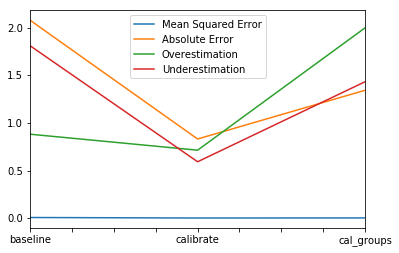

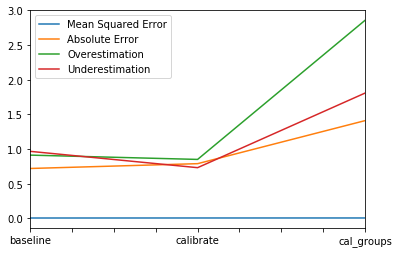

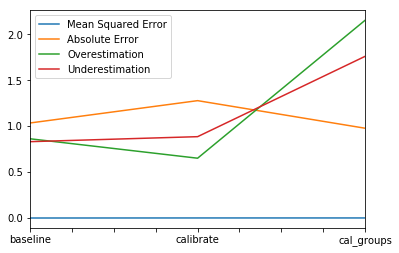

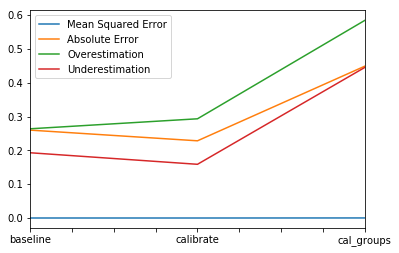

In [75]:
lr_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
dt_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
rf_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
svr_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()

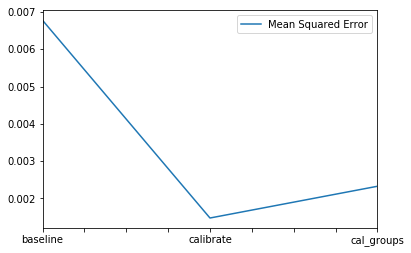

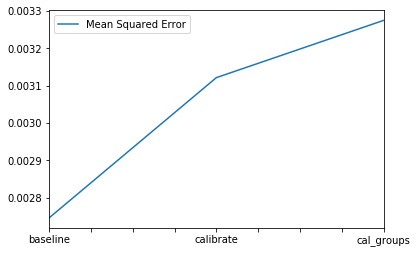

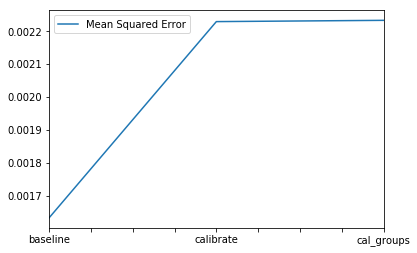

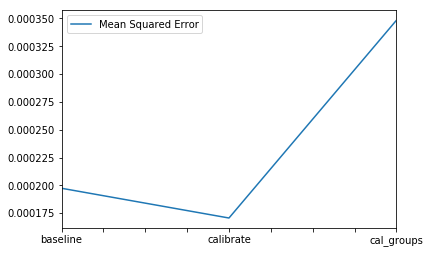

In [78]:
lr_err.transpose()[['Mean Squared Error']].plot()
dt_err.transpose()[['Mean Squared Error']].plot()
rf_err.transpose()[['Mean Squared Error']].plot()
svr_err.transpose()[['Mean Squared Error']].plot()

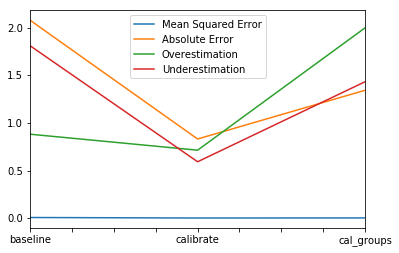

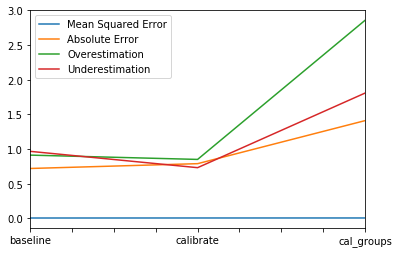

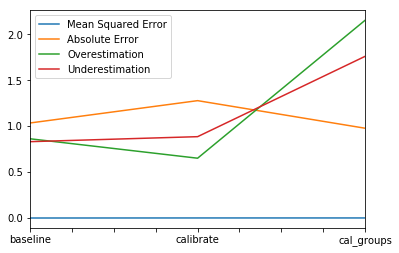

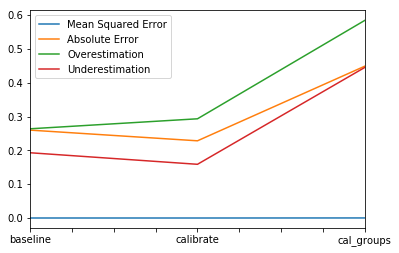

In [75]:
lr_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
dt_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
rf_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()
svr_err.transpose()[['Mean Squared Error', 'Absolute Error', 'Overestimation','Underestimation']].plot()

In [49]:
train_test_short(df_rf,10,10,10)

C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:70: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))


,baseline,calibrate,cal_groups
Mean Squared Error,0.880738,0.910989,0.890947
Absolute Error,180.509393,153.104360,166.836397
Overestimation,76.903363,40.792441,59.596264
Underestimation,103.606030,112.311919,107.240133
Spearman Rho,0.126254,0.078153,0.041007
Kendall Tau,0.042183,0.038103,0.075532
KL divergence,NaN,NaN,NaN


In [50]:
train_test_short(df_svr,10,10,10)

C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:70: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))


,baseline,calibrate,cal_groups
Mean Squared Error,0.890299,0.842717,0.861921
Absolute Error,187.912627,196.520534,201.862261
Overestimation,82.831457,100.713429,105.668526
Underestimation,105.081169,95.807105,96.193735
Spearman Rho,0.061474,0.074781,0.085645
Kendall Tau,0.040377,0.046455,0.044970
KL divergence,NaN,NaN,NaN


In [113]:
stabalize_cv(df_svr,5,10)

C:\Users\Caitlin\Documents\git\fair_ranking\calibration_util.py:70: RuntimeWarning: invalid value encountered in double_scalars
  return np.cov(a,b)[0][1] / (np.std(a)*np.std(b))


,baseline,calibrate,cal_groups
Mean Squared Error,0.830066,0.822597,0.885001
Absolute Error,231.323487,249.628636,256.105415
Overestimation,103.062242,134.402756,140.573075
Underestimation,128.261246,115.225880,115.535389
Spearman Rho,0.068598,0.083636,0.059770
Kendall Tau,0.048787,0.060349,0.049993
KL divergence,NaN,NaN,NaN


In [86]:
def se(y_pred, y):
    diffs = np.subtract(y_pred, y)
    return np.sum(np.square(diffs))

#overestimate
def oe(y_pred, y):
    diffs = y_pred - y
    return [x if x > 0 else 0 for x in diffs]

#underestimate
def ue(y_pred, y):
    diffs = y_pred - y
    return [abs(x) if x < 0 else 0 for x in diffs]

def get_mse(vals):
    m = np.sum([math.pow(x[0]-x[1], 2) for x in vals])
    return m/len(vals)

#overestimate
def get_oe(vals):
    return np.sum([max(0,x[0]-x[1]) for x in vals])

#underestimate
def get_ue(vals):
    return np.sum([min(0,x[0]-x[1]) for x in vals])

#df = ['y_pred','y','g']
def sliding_mse(df, window, step):
    df.sort_values('y_pred', ascending=False, inplace=True)
    err0=[]
    err1=[]
    start=0
    end=window
    while end<len(df):
        vals = df.iloc[range(start,end)]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_mse(g0))
        err1.append(get_mse(g1))
        start+=step
        end+=step
    #get end of rank is needed
    if(start > len(df)-window):
        vals = df.iloc[range(len(df)-window,len(df))]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_mse(g0))
        err1.append(get_mse(g1))
    return err0, err1

#df = ['y_pred','y','g']
def sliding_ue(df, window, step):
    df.sort_values('y_pred', ascending=False, inplace=True)
    err0=[]
    err1=[]
    start=0
    end=window
    while end<len(df):
        vals = df.iloc[range(start,end)]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_ue(g0))
        err1.append(get_ue(g1))
        start+=step
        end+=step
    #get end of rank is needed
    if(start > len(df)-window):
        vals = df.iloc[range(len(df)-window,len(df))]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_ue(g0))
        err1.append(get_ue(g1))
    return err0, err1

#df = ['y_pred','y','g']
def sliding_oe(df, window, step):
    df.sort_values('y_pred', ascending=False, inplace=True)
    err0=[]
    err1=[]
    start=0
    end=window
    while end<len(df):
        vals = df.iloc[range(start,end)]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_oe(g0))
        err1.append(get_oe(g1))
        start+=step
        end+=step
    #get end of rank is needed
    if(start > len(df)-window):
        vals = df.iloc[range(len(df)-window,len(df))]
        g0 = np.array(vals[vals['g']==0.])
        g1 = np.array(vals[vals['g']==1.])
        err0.append(get_oe(g0))
        err1.append(get_oe(g1))
    return err0, err1


#df = ['y_pred','y','g']
def sliding_prob(df, window, step):
    df.sort_values('y_pred', ascending=False, inplace=True)
    prob0=[]
    prob1=[]
    start=0
    end=window
    g0=(df['g']==0.).sum()
    g1=(df['g']==1.).sum()
#     print(g0)
#     print(g1)
    while end<len(df):
        vals = df.iloc[range(start,end)]
        n0 = (vals['g']==0.).sum()
        n1 = (vals['g']==1.).sum()
        prob0.append(max(n0/(g0/window), 0.0001))
        prob1.append(max(n1/(g1/window), 0.0001))
        start+=step
        end+=step
    #get end of rank is needed
    if(start > len(df)-window):
        vals = df.iloc[range(len(df)-window,len(df))]
        n0 = (vals['g']==0.).sum()
        n1 = (vals['g']==1.).sum()
        prob0.append(max(n0/(g0/window), 0.0001))
        prob1.append(max(n1/(g1/window), 0.0001))
    return prob0, prob1

def get_kl_err(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    return stats.entropy(err0, qk=err1)
        
def KL_eval(dfs, err):
    errs =[]
    for df in dfs:
        print(df)
        errs.append(get_kl_err(df, err))
    return errs 

def get_spear_err(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    #return stats.spearmanr(a,b)[0]
    return np.cov(err0,err1)[0][1] / (np.std(err0)*np.std(err1))
    
def get_kendall_err(df, err, window=100, step=10):
    err0,err1 = err(df, window, step)
    return stats.kendalltau(err0,err1, nan_policy='raise')[0]